Welcome to week three of [Regression Modelling in Practice](https://www.coursera.org/learn/regression-modeling-practice/home/welcome)! I will write this step in the **Breast Cancer Causes Internet Usage!** (BCCIU) [project](http://lilithelina.tumblr.com/post/128347327089/choice-of-data) in two parts:
- The first part (which is this) will apply a multiple regression model to analyse the association of one of my response variables (internet users per 100 people in 2010) with my primary explanatory variable (new breast cancer cases per 100,000 females in 2002) and additional variables (my previously used [moderator](http://lilithelina.tumblr.com/post/143790528809/data-analysis-moderators-python) income per person in 2010, and the percentage of urban populations in 2008). This is also the part of the project that will be graded on [coursera](https://www.coursera.org/).
- The second part will make use of another modelling technique we learned about this week: [polynomial regression](https://en.wikipedia.org/wiki/Polynomial_regression). This will allow me to better analyse the association between my second response variable (percentage of employed females in 2007) with breast cancer as explanatory variable, since I've already seen that [linear regression](http://lilithelina.tumblr.com/post/147586176199/basic-linear-regression-r) doesn't work on these data.

As before, the output will look lots better in the [nbviewer](http://nbviewer.ipython.org/github/LilithElina/Data-Analysis-and-Interpretation/tree/master/RegModPrac/Week%20Three%20-%20Multiple%20Regression.ipynb) than on tumblr.

### Preparation

First up comes the code to prepare the raw data, filtering for the country identifiers and breast cancer, internet usage, income, and urbanisation.

In [1]:
# activate inline plotting, should be first statement
%matplotlib inline

# load packages
import warnings                     # ignore warnings (e.g. from future, deprecation, etc.)
warnings.filterwarnings('ignore')   # for layout reasons, after I read and acknowledged them all!

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# read in data
data = pandas.read_csv("../gapminder.csv", low_memory=False)

# use country names as row names/indices for plotting purposes
data.index = data["country"]
data.drop("country", axis=1)

# subset the data and make a copy to avoid error messages later on
sub = data[["breastcancerper100th", "incomeperperson", "internetuserate", "urbanrate"]]
sub_data = sub.copy()

# change data types to numeric
sub_data["breastcancerper100th"] = pandas.to_numeric(sub_data["breastcancerper100th"], errors="coerce")
sub_data["incomeperperson"] = pandas.to_numeric(sub_data["incomeperperson"], errors="coerce")
sub_data["internetuserate"] = pandas.to_numeric(sub_data["internetuserate"], errors="coerce")
sub_data["urbanrate"] = pandas.to_numeric(sub_data["urbanrate"], errors="coerce")

# remove rows with missing values (copy again)
sub2 = sub_data.dropna()
sub_data2 = sub2.copy()

The explanatory variables (all but internet usage) should be mean centred for easier interpretation. To do this, I have to subtract each variable's mean from every single observation for the three variables in question: breast cancer, income, and urbanisation.

In [2]:
# take breast cancer case column and subtract mean
sub_data2[["breastCentred"]] = sub_data2[["breastcancerper100th"]] - sub_data2[["breastcancerper100th"]].mean()

# take income per person column and subtract mean
sub_data2[["incomeCentred"]] = sub_data2[["incomeperperson"]] - sub_data2[["incomeperperson"]].mean()

# take urbanisation column and subtract mean
sub_data2[["urbanCentred"]] = sub_data2[["urbanrate"]] - sub_data2[["urbanrate"]].mean()

# examine data summary
print("data after centring")
print(sub_data2.describe())

data after centring
       breastcancerper100th  incomeperperson  internetuserate   urbanrate  \
count            163.000000       163.000000       163.000000  163.000000   
mean              37.781595      7312.376683        33.747359   56.245767   
std               23.122332     10467.625388        27.868070   22.943194   
min                3.900000       103.775857         0.720009   10.400000   
25%               20.600000       691.093623         9.102256   36.840000   
50%               30.300000      2425.471293        28.731883   59.460000   
75%               50.350000      8880.432040        52.513403   73.490000   
max              101.100000     52301.587179        95.638113  100.000000   

       breastCentred  incomeCentred  urbanCentred  
count   1.630000e+02   1.630000e+02  1.630000e+02  
mean   -1.299029e-14  -2.081236e-12  2.353945e-15  
std     2.312233e+01   1.046763e+04  2.294319e+01  
min    -3.388160e+01  -7.208601e+03 -4.584577e+01  
25%    -1.718160e+01  -6.6

The `describe()` function again does not return a mean equal to zero for centred explanatory variables, but the values are close to zero. This is a problem of float representation common in Python, as explained in the [Python tutorial](https://docs.python.org/3/tutorial/floatingpoint.html).

### Regression Models

I'll start again with the [basic linear model](http://lilithelina.tumblr.com/post/147441369709/basic-linear-regression-python) so that I can compare this to the multiple regression models.

In [3]:
# regression model for breast cancer and internet usage
print ("OLS regression model for the association between breast cancer cases and internet use rate")
reg1 = smf.ols("internetuserate ~ breastCentred", data=sub_data2).fit()
print (reg1.summary())

OLS regression model for the association between breast cancer cases and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     268.1
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           4.26e-36
Time:                        17:08:58   Log-Likelihood:                -693.28
No. Observations:                 163   AIC:                             1391.
Df Residuals:                     161   BIC:                             1397.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------

For the association of internet use rates and breast cancer cases per 100,000 people, the $r²$ value (or the "coefficient of correlation") at the top right of the OLS regression results is $0.625$, which we already saw when calculating [Pearson's correlation coefficient](http://lilithelina.tumblr.com/post/135265946959/data-analysis-pearson-correlation-python). It means that the variability in occurrence of new breast cancer cases can explain 62% of the variability in internet usage.

Below this first part of the results, parameter estimates are presented for either the intercept (internet usage) or breast cancer cases. The coefficient for breast cancer is positive, meaning that there is a positive association between breast cancer and internet usage. The low *p*-value and the close confidence intervals indicate that this is highly significant.

Could this association be confounded by another variable? The income per person could be a likely indicator of how many people have access to the internet in a country. Admittedly, I've used this as moderator for a Pearson correlation [before](http://lilithelina.tumblr.com/post/143790528809/data-analysis-moderators-python) and the primary association was still significant, but it can't hurt to test that again with a multiple regression model.

In [4]:
# regression model for breast cancer and income with internet usage
print ("OLS regression model for the association between breast cancer cases, income,\nand internet use rate")
reg2 = smf.ols("internetuserate ~ breastCentred + incomeCentred", data=sub_data2).fit()
print (reg2.summary())

OLS regression model for the association between breast cancer cases, income,
and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     226.3
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           2.26e-47
Time:                        17:08:58   Log-Likelihood:                -663.74
No. Observations:                 163   AIC:                             1333.
Df Residuals:                     160   BIC:                             1343.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------

The $r²$ value for the model increased from $0.625$ to $0.739$, indicating that even more variability in internet usage can now be explained. Additionally, both coefficients and *p*-values indicate a highly significant positive association between internet usage and breast cancer or income.

On the other hand, the warnings below the model summary point out a flaw in the model: there could be strong multicollinearity - which means the explanatory variables used could be correlated (e.g. if in countries with higher per person income, more breast cancer cases are detected). This can lead to some instability in the parameter estimation, but it is [difficult to predict the exact effects of multicollinearity](http://stats.stackexchange.com/questions/86269/what-is-the-effect-of-having-correlated-predictors-in-a-multiple-regression-mode). In this case, both variables are still significantly associated with my response variable and the coefficients fall nicely into quite small confidence intervals. I'm satisfied with that and will simply add another explanatory variable (urbanisation) to the model.

In [5]:
# regression model for breast cancer, income, and urbanisation with internet usage
print ("OLS regression model for the association between breast cancer cases, income,\nurbanisation, and internet use rate")
reg3 = smf.ols("internetuserate ~ breastCentred + incomeCentred + urbanCentred", data=sub_data2).fit()
print (reg3.summary())

OLS regression model for the association between breast cancer cases, income,
urbanisation, and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     174.4
Date:                Mon, 25 Jul 2016   Prob (F-statistic):           4.60e-50
Time:                        17:08:58   Log-Likelihood:                -654.47
No. Observations:                 163   AIC:                             1317.
Df Residuals:                     159   BIC:                             1329.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------

Of course, the error is still there, and nothing much has changed about the model. The $r²$ still increased a bit, and the urbanisation rate is also significantly, positively associated with internet usage.

If one of these variables were a true confounder, the association between the primary explanatory variable (breast cancer) and internet usage would not be significant any more. As it is, all three explanatory variables tested seem to be associated with internet usage without confounding each other much. Only a decrease in the parameter estimates indicates a "less positive" association of the single explanatory variables with the response variable.

### Diagnostics

Different diagnostic plots can be used to assess the validity of and possible problems in the model. A quantile-quantile plot (or [Q-Q plot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)) can be used to check whether or not the residuals<sup>[1](#myfootnote1)</sup> of the regression model are normally distributed. The Q-Q plot plots the quantiles of a normal distribution against the quantiles of the residuals. If the points follow a straight line, the distributions are similar.

<a name="myfootnote1">1</a>: A residual is the difference between the actual and the predicted value (based on the regression model) of the response variable.

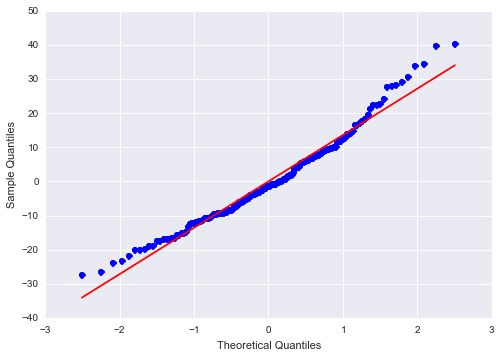

In [6]:
qqfig = sm.qqplot(reg3.resid, line='r')

In the plot above, the red line marks the perfect normal distribution, and most of the points lie close to it, indicating that the residuals are almost normally distributed. Especially at both ends of the line, the quantiles deviate from the norm, though. This could mean that the regression model doesn't fully capture the association between internet usage and the explanatory variables (breast cancer, income, and urban rate). Other factors could be involved as well, it seems.

This can also be further analysed with the following plot.

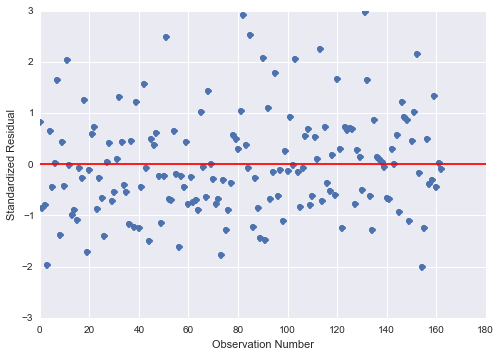

In [7]:
stdres = pandas.DataFrame(reg3.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number');

The second plot shows the standardised residuals, which are the residuals minus their mean divided by the standard deviation. This normalisation yields a set of values with a mean of zero and a standard deviation of one. In a standard normal distribution, 68% of the observations are expected to fall within one standard deviation of the mean, and 95% of the observations are expected to fall within two standard deviations of the mean.

In the plot above, this *seems* to be the case, since many of the plotted values lie between -1 and 1. No standardised residual is smaller than -2, but some are between 2 and 3 (so above $SD = 2$). Out of 163 values, ten or eleven were greater than or equal to two, which is roughly 6%. This suggests a rather poor model fit and that an important explanatory variable could be missing.

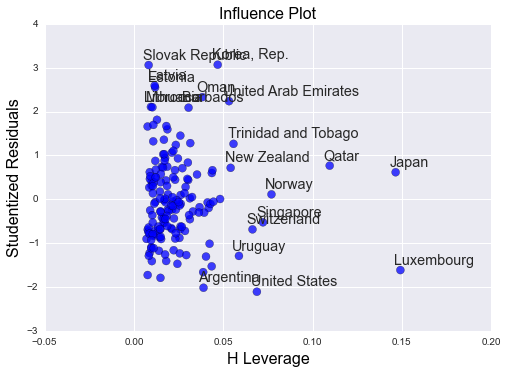

In [8]:
levfig = sm.graphics.influence_plot(reg3, size=8)

The third plot is a leverage, or influence, plot. It visualises how much influence single observations have on the model. The studentised residuals plotted here were divided by their standard deviations, without subtracting the mean first. In this approach, observations with values higher than 2 or smaller than -2 are outliers. The leverage signifies how much the predicted scores of observations would change when one would be removed, and can take values between 0 and 1.

In this case, there are quite a number of outliers at the top of the plot, but they have very low leverage and therefore not much influence on the model. Two other observations, from Japan and Luxembourg, stand out with the highest leverage observed here. They seem to influence the model more than the rest, but since they are not outliers, that's probably not a big problem.